<a href="https://colab.research.google.com/github/AsthmaticDonkey/Thesis/blob/master/TraditionalRegistration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


path = Path('/content/drive/My Drive/ThesisData')

dest = path
dest.mkdir(parents=True, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt, cm
from __future__ import division
import pydicom as DCM


dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')

/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


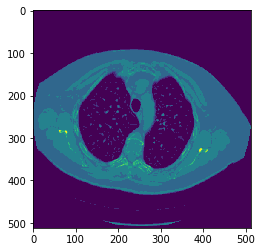

In [0]:
img=mpimg.imread('/content/drive/My Drive/ThesisData/088.png')
imgplot = plt.imshow(img_orig)

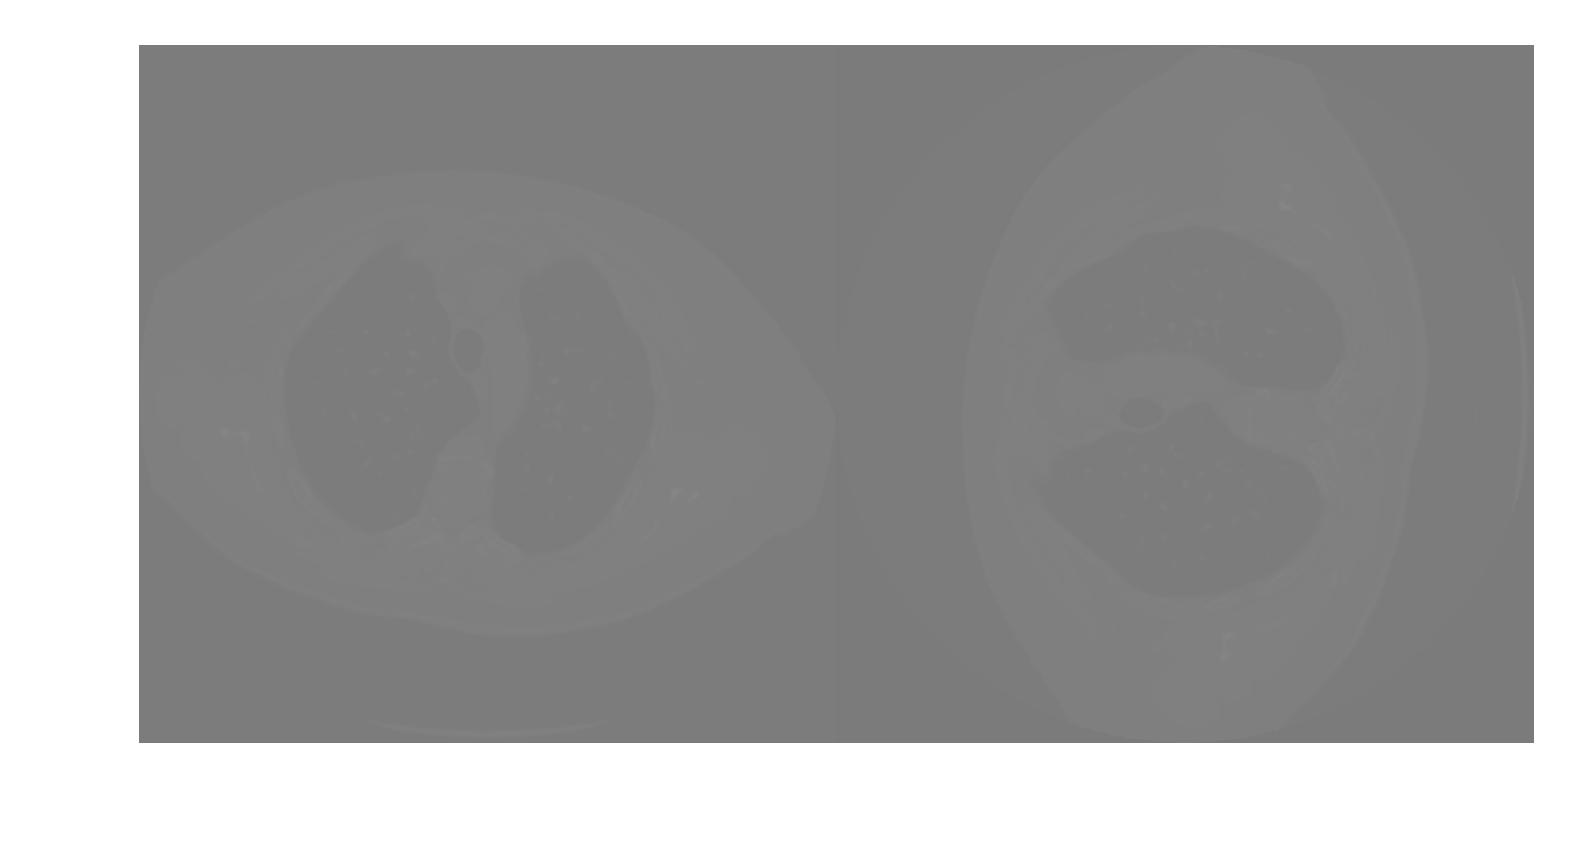

In [0]:
# Reading images
img_orig = cv2.imread('/content/drive/My Drive/ThesisData/059.png',0) # reference image
img_warp = cv2.imread('/content/drive/My Drive/ThesisData/0592.png',0) # target image

MAX_FEATURES = 500 # maximum number of features to be detected

# Initiate ORB detector
orb = cv2.ORB_create(MAX_FEATURES)

# find the keypoints and descriptors with ORB
keypoints1, descriptor1 = orb.detectAndCompute(img_orig,None)
keypoints2, descriptor2 = orb.detectAndCompute(img_warp,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(descriptor1,descriptor2)

# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x:x.distance)

# Draw first 10 matches.
matches = matches[:10]
img_match = cv2.drawMatches(img_orig, keypoints1,
                            img_warp, keypoints2,
                            matches, img_warp,
                            flags=2)

plt.figure(dpi=300)
plt.imshow(img_match)
plt.axis('off');

In [0]:
from image_match.goldberg import ImageSignature

gis = ImageSignature()
a = gis.generate_signature(img_orig)
b = gis.generate_signature(img_warp)
gis.normalized_distance(a, b)

0.6864707442766191